In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import q
import torch
import matplotlib.pyplot as plt
from q import Agent, kl
env = q.Environment()

In [13]:
agent = Agent(env.n_states, env.n_actions)
d = (agent.world/agent.world.sum(-1,keepdim=True))
torch.where().isn

tensor([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, na

In [169]:
w = torch.ones(10,10,10)
w / w.sum(-1, keepdim=True)

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000,

In [167]:
env.transitions.shape

torch.Size([10, 10, 10])

In [165]:
kl(env.transitions, agent.world/agent.world.sum(-1, keepdim=True))

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [0., nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [3]:
gamma = 0.9  # Discount factor
lr = 0.5  # Learning rate
mu = 0.1  # Exploration probability

env = q.Environment()
agent_e = q.Agent(env.n_states, env.n_actions, gamma, lr, mu)
agent_i = q.Agent(env.n_states, env.n_actions, gamma, lr, mu)

print('int: intrinsically-motivated agent world model divergence')
print('ext: extrinsically-motivated agent world model divergence')
print('exp int ext')

with torch.inference_mode():
    num_experiments = 131072
    for exp in range(num_experiments):
        q.train(agent_i, env, reward_kind='prob_diff')
        q.train(agent_e, env, reward_kind='env')
        if exp % 1024 == 0:
            intrinsic_kl = ((env.transitions+1e-8) * ((env.transitions+1e-8).log() - (agent_i.counter/agent_i.counter.sum(-1) + 1e-8).log())).sum()
            extrinsic_kl = ((env.transitions+1e-8) * ((env.transitions+1e-8).log() - (agent_e.counter/agent_e.counter.sum(-1) + 1e-8).log())).sum()
            print(exp, f'{intrinsic_kl.item():.3f}', f'{extrinsic_kl.item():.3f}')

fig, (axl,axr) = plt.subplots(1, 2, figsize=(10, 5))
axl.matshow(agent_i.q_values)
axr.matshow(agent_e.q_values)

int: intrinsically-motivated agent world model divergence
ext: extrinsically-motivated agent world model divergence
exp int ext
0 nan nan
1024 nan nan
2048 nan nan


KeyboardInterrupt: 

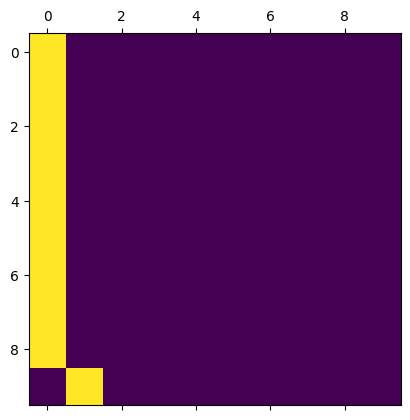

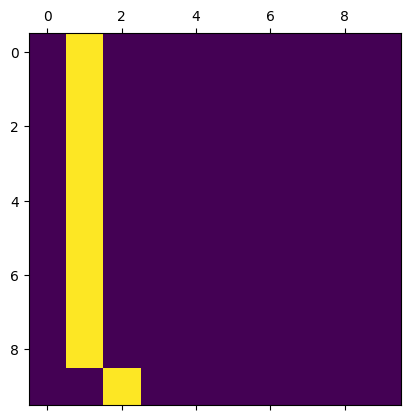

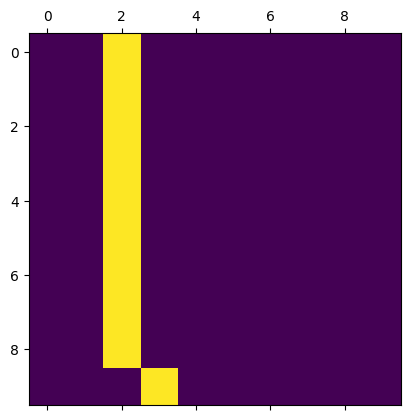

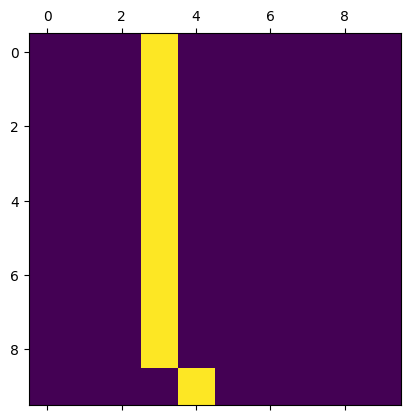

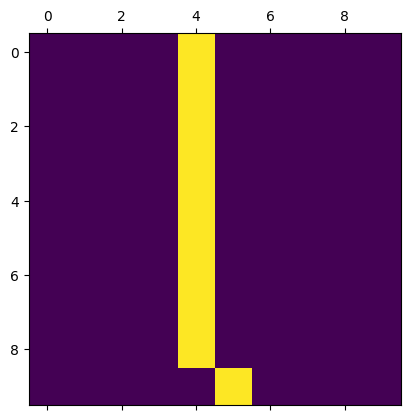

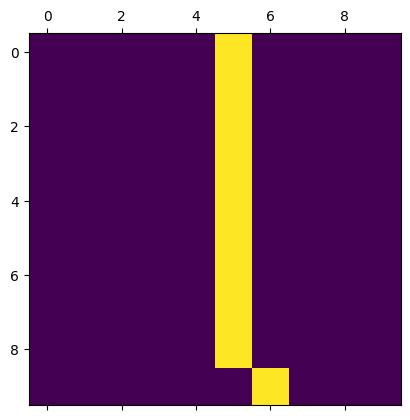

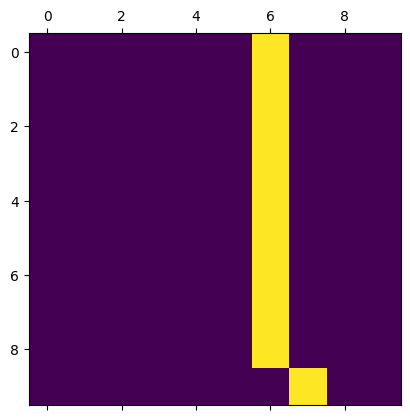

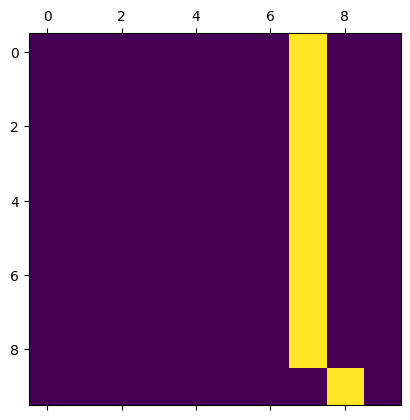

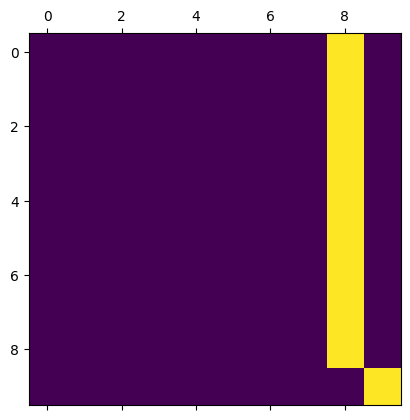

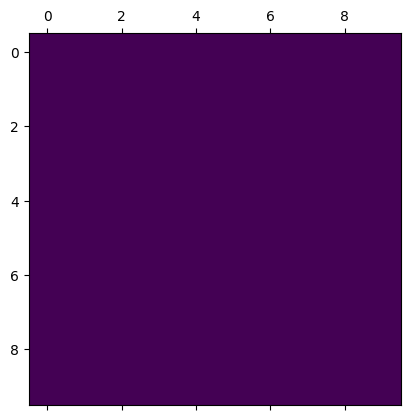

In [11]:
x = q.make_env(10,10)
for i in range(10):
    plt.matshow(x[i,...])

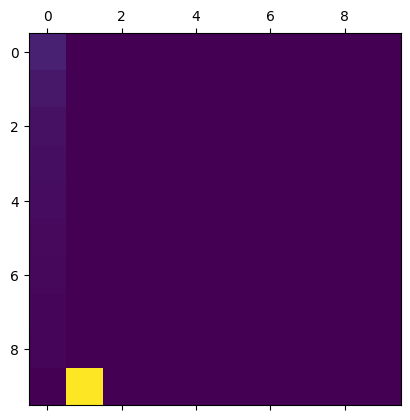

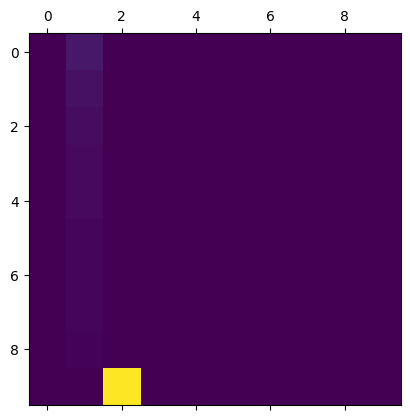

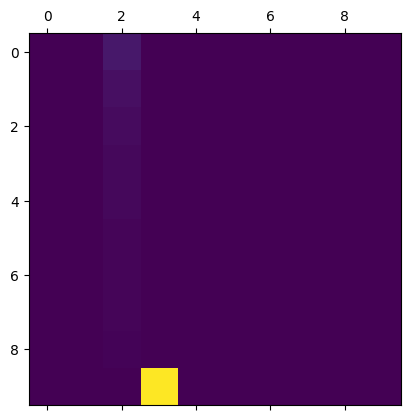

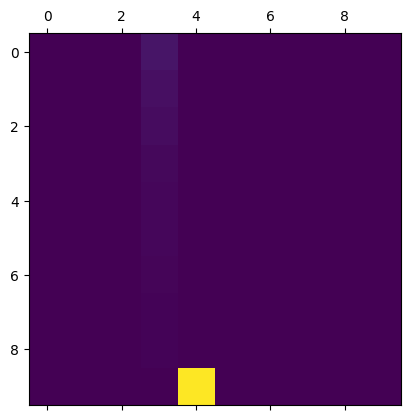

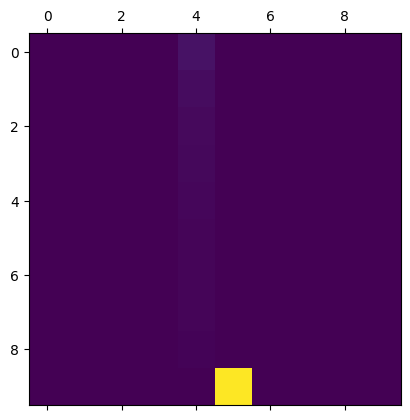

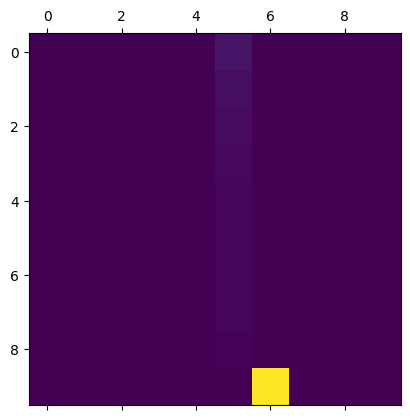

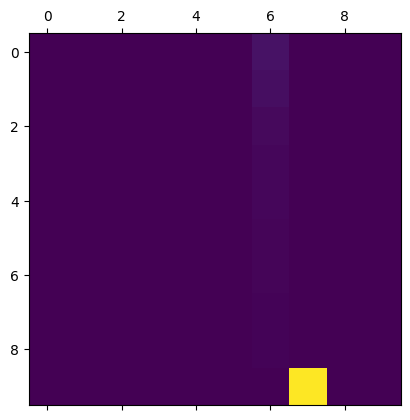

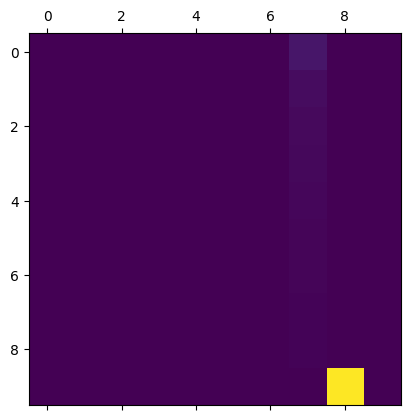

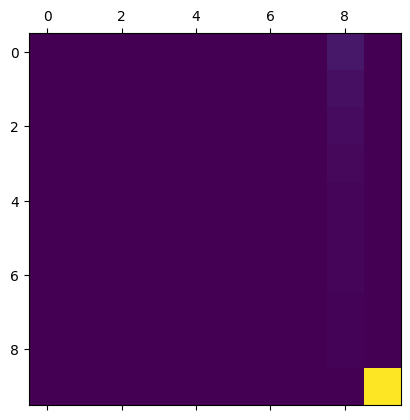

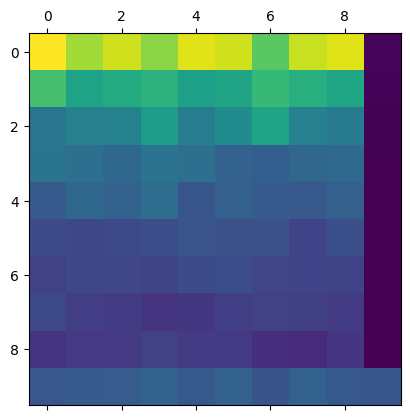

In [10]:
x = agent_i.counter/agent_i.counter.sum(-1)
for i in range(10):
    plt.matshow(x[i,...])

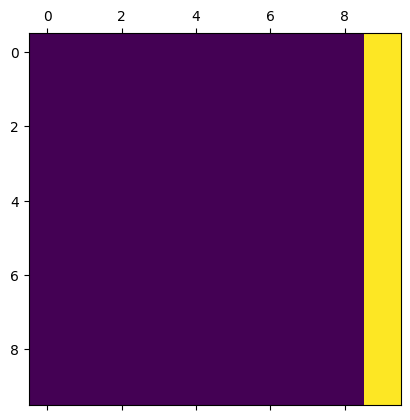

In [5]:
x =torch.zeros(10,10); x[:, -1] = 1
plt.matshow(x)

In [ ]:
#%lprun -m q q.train(agent_i, env, reward_kind='prob_diff')